In [7]:
import Sokoban_env
from Sokoban_env1 import Sokoban_v2
import numpy as np
import matplotlib.pyplot as plt




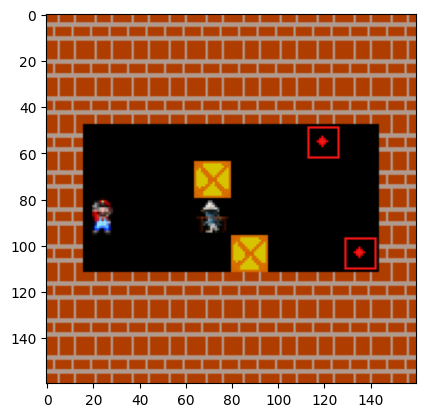

In [8]:
env = Sokoban_v2(map_name="special_3") 
env.reset()
plt.imshow(env.render())

In [9]:
import numpy as np

def q_learning(env, learning_rate, discount_factor, epsilon, num_episodes):
    state_space = env.num_states.n
    action_space = env.action_space.n
    q_table = np.zeros((state_space, action_space))
    eva = [] 

    # Q-learning algorithm
    for episode in range(num_episodes):
        if episode % 50 == 0:
            print(f'---- Episode: {episode}')

        state = env.reset()  
        done = False
        total_reward = 0

        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  
            else:
                action = np.argmax(q_table[state, :]) 

            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            q_table[state, action] += learning_rate * (
                reward + discount_factor * np.max(q_table[next_state, :]) - q_table[state, action]
            )

            state = next_state 
        eva.append(total_reward)

    return q_table, eva
if __name__ == "__main__":
    learning_rate = 0.1
    discount_factor = 0.9
    epsilon = 0.8 
    num_episodes = 5000

    q_table, rewards = q_learning(env, learning_rate, discount_factor, epsilon, num_episodes)

    print("Q-Table:")
    print(q_table)
    print("Total Rewards per Episode:")
    print(rewards)


---- Episode: 0
---- Episode: 50
---- Episode: 100
---- Episode: 150
---- Episode: 200
---- Episode: 250
---- Episode: 300
---- Episode: 350
---- Episode: 400
---- Episode: 450
---- Episode: 500
---- Episode: 550
---- Episode: 600
---- Episode: 650
---- Episode: 700
---- Episode: 750
---- Episode: 800
---- Episode: 850
---- Episode: 900
---- Episode: 950
---- Episode: 1000
---- Episode: 1050
---- Episode: 1100
---- Episode: 1150
---- Episode: 1200
---- Episode: 1250
---- Episode: 1300
---- Episode: 1350
---- Episode: 1400
---- Episode: 1450
---- Episode: 1500
---- Episode: 1550
---- Episode: 1600
---- Episode: 1650
---- Episode: 1700
---- Episode: 1750
---- Episode: 1800
---- Episode: 1850
---- Episode: 1900
---- Episode: 1950
---- Episode: 2000
---- Episode: 2050
---- Episode: 2100
---- Episode: 2150
---- Episode: 2200
---- Episode: 2250
---- Episode: 2300
---- Episode: 2350
---- Episode: 2400
---- Episode: 2450
---- Episode: 2500
---- Episode: 2550
---- Episode: 2600
---- Episode: 26

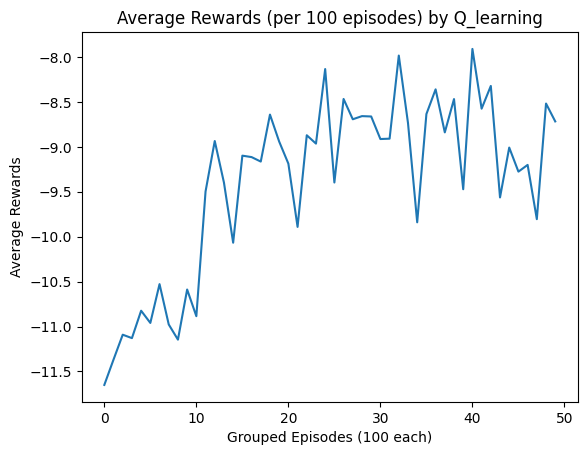

In [10]:
import matplotlib.pyplot as plt
group_size = 100
average_rewards = [sum(rewards[i:i + group_size]) / group_size for i in range(0, len(rewards), group_size)]

plt.plot(average_rewards)
plt.title('Average Rewards (per 100 episodes) by Q_learning')
plt.xlabel('Grouped Episodes (100 each)')
plt.ylabel('Average Rewards')
plt.show()


In [11]:
np.mean(rewards)

-9.399499999999977

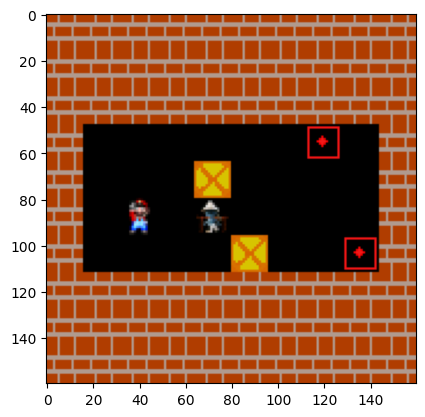

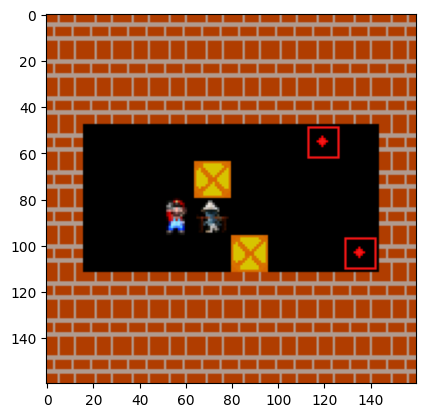

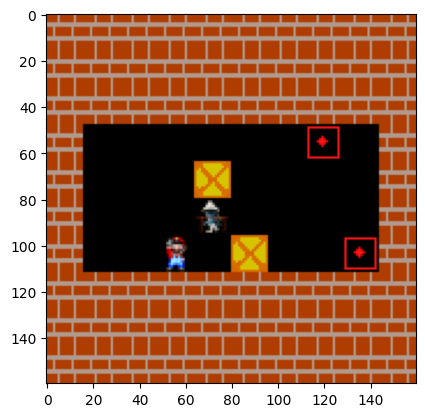

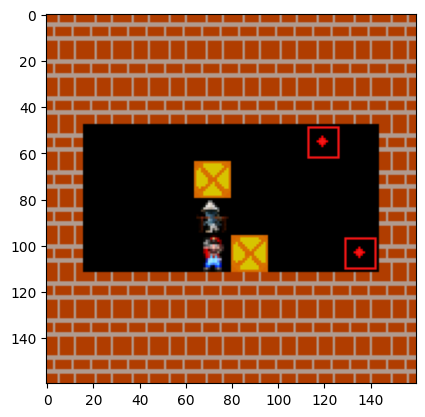

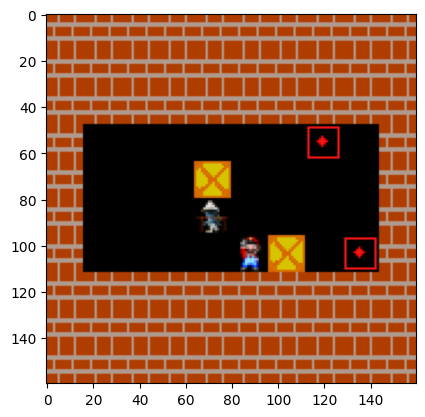

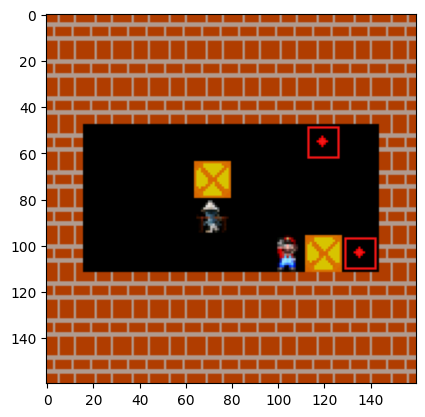

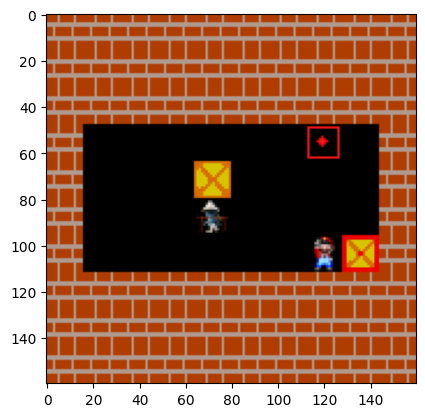

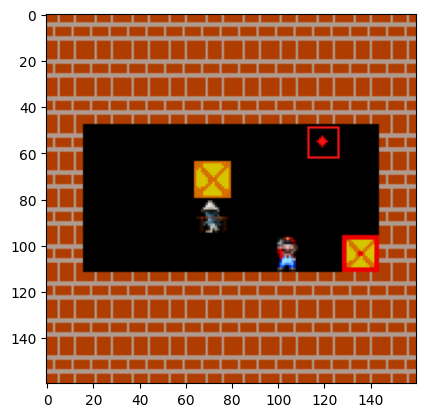

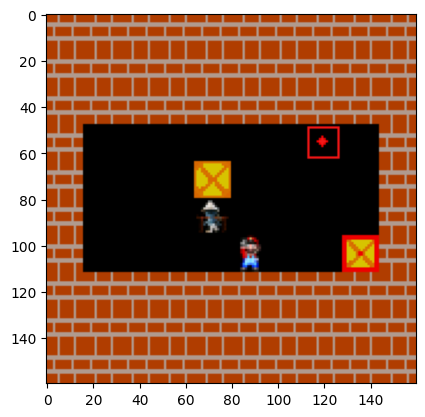

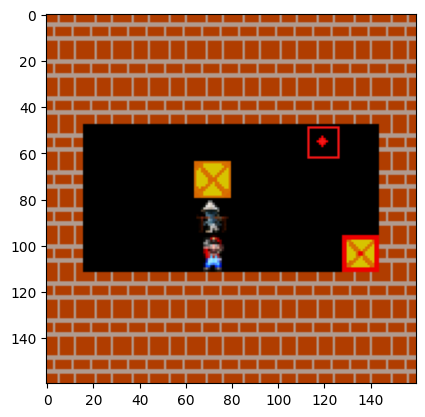

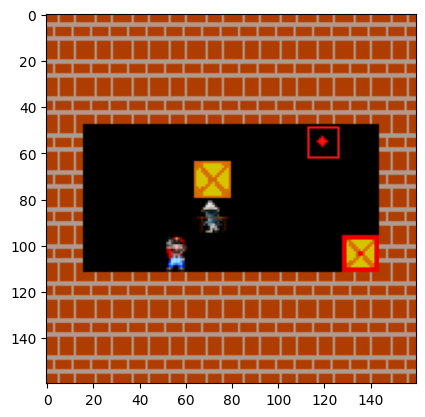

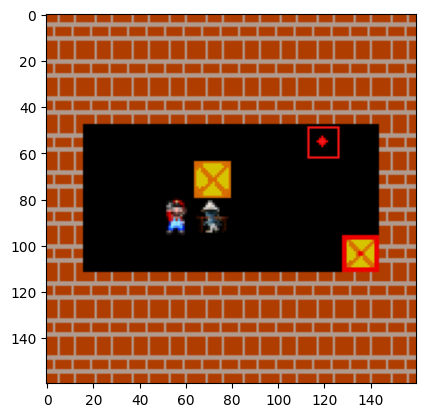

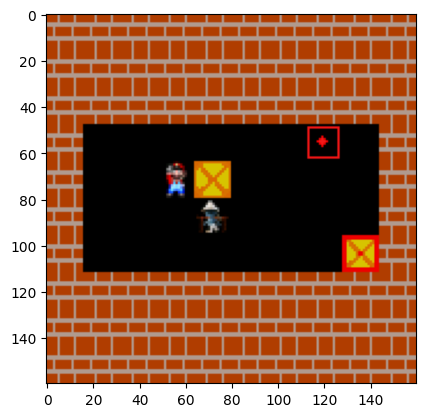

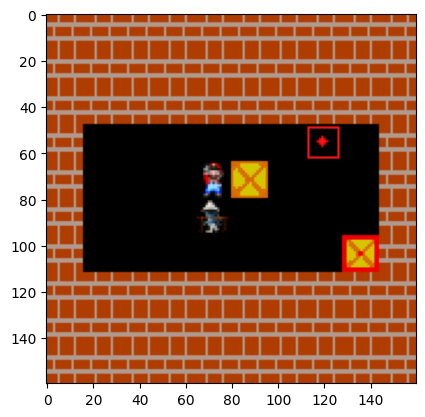

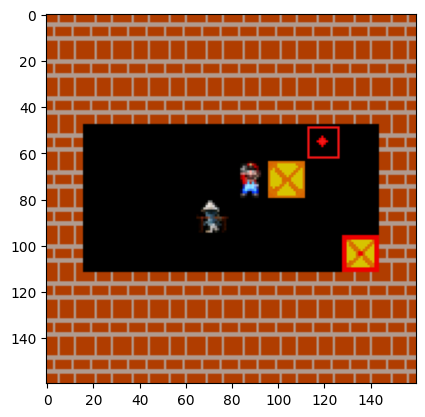

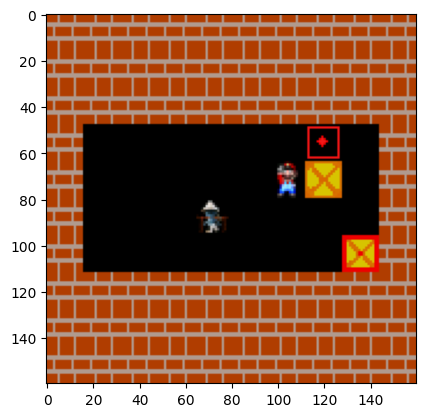

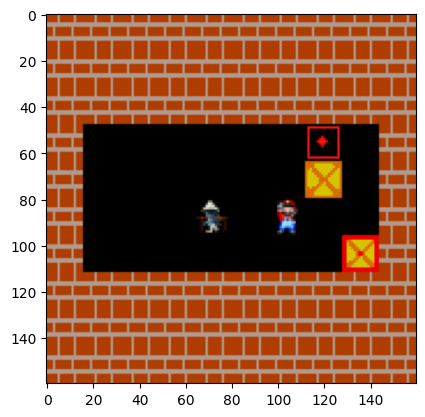

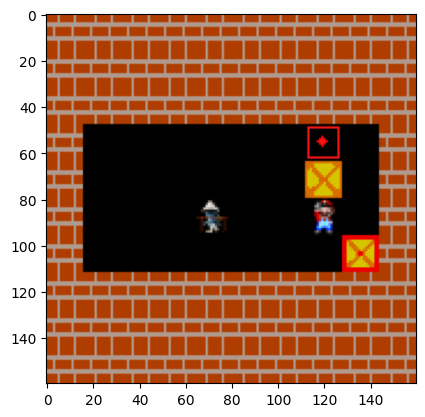

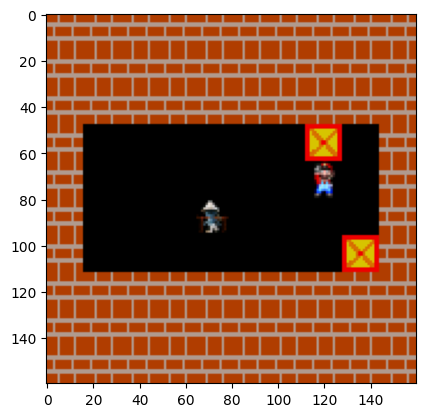

In [12]:
env.reset()
state = 0
while True:
    action = np.argmax(q_table[state,:])
    new_state, reward, done, _ = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.show()
    if done:
        break
    state = new_state
env.close()